# Day 10: The Stars Align

Credit: https://www.reddit.com/r/adventofcode/comments/a4urh5/day_10_in_only_8_iterations_with_gradient_descent/

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Read input

In [2]:
with open('10_input.txt', 'r') as f:
    lines = [[int(n) for n in re.findall('-?\d+', line)] for line in f]

In [3]:
print("Number of points:", len(lines))
lines[0:5]

Number of points: 357


[[50769, -40375, -5, 4],
 [40697, 10253, -4, -1],
 [-40315, -50495, 4, 5],
 [-40296, -20123, 4, 2],
 [50760, -50499, -5, 5]]

Set up the TF variables

In [4]:
x = tf.constant(np.array(lines, dtype=np.float32))
position = x[:, :2]
velocity = x[:, 2:]
time = tf.placeholder_with_default(tf.Variable(0.0), shape=[])
projection = position + velocity * time

Minimize the variance of the projection with respect to time

In [5]:
_, variance = tf.nn.moments(projection, axes=[0])
loss = tf.reduce_sum(variance)
train_op = tf.train.GradientDescentOptimizer(0.02).minimize(loss)

In [6]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev = None
    while True:
        _, l, t = sess.run([train_op, loss, time])
        t = round(t)
        l = round(l, 1)
        if (t, l) == prev:
            break
        
        prev = (t, l)
    
    result_proj = sess.run(projection, feed_dict={time: t}).astype(np.int32)

Shift to projection to the origin of the coordinate system

In [7]:
result_proj -= np.min(result_proj, axis=0)

Show results

Part 1:


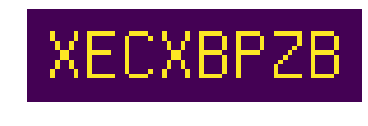

Part 2: 10124


In [8]:
size = np.max(result_proj, axis=0) + 1
im = np.zeros(size)
for p in result_proj:
    im[tuple(p)] += 1

print("Part 1:")
plt.axis('off')
plt.imshow(np.pad(im.T > 0, 5, 'constant'))
plt.show()

print("Part 2:", int(t))